In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Plotting the axial density

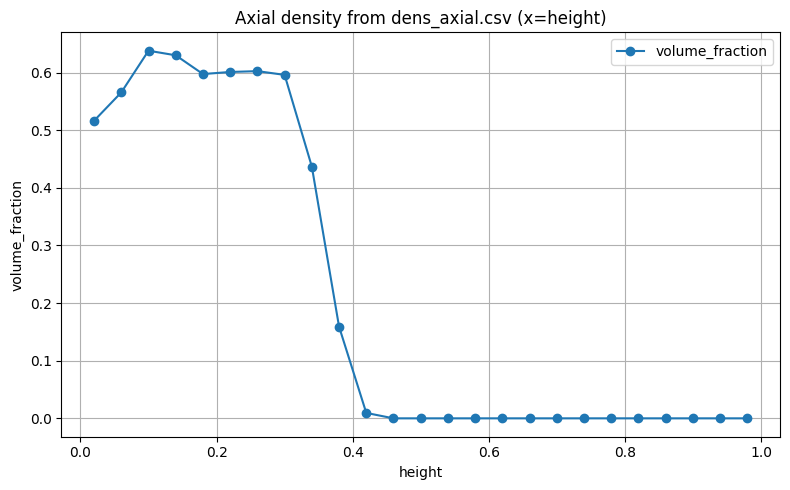

In [50]:
# Load and inspect the data
df = pd.read_csv('data/dens_axial.csv')
df.head()

# Select numeric columns
num = df.select_dtypes(include=[np.number])

if num.shape[1] == 0:
    raise RuntimeError("No numeric columns found in dens_axial.csv to plot.")

plt.figure(figsize=(8,5))

if num.shape[1] == 1:
    # Single numeric column: plot vs index
    plt.plot(df.index, num.iloc[:, 0], '-o')
    plt.xlabel('index')
    plt.ylabel(num.columns[0])
    plt.title(f"{num.columns[0]} vs index")
else:
    # Use the first numeric column as x and plot remaining numeric columns vs it
    x = num.iloc[:, 0]
    for col in num.columns[1:]:
        plt.plot(x, num[col], marker='o', label=col)
    plt.xlabel(num.columns[0])
    plt.ylabel(' / '.join(num.columns[1:]))
    plt.title(f"Axial density from dens_axial.csv (x={num.columns[0]})")
    plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the radial density

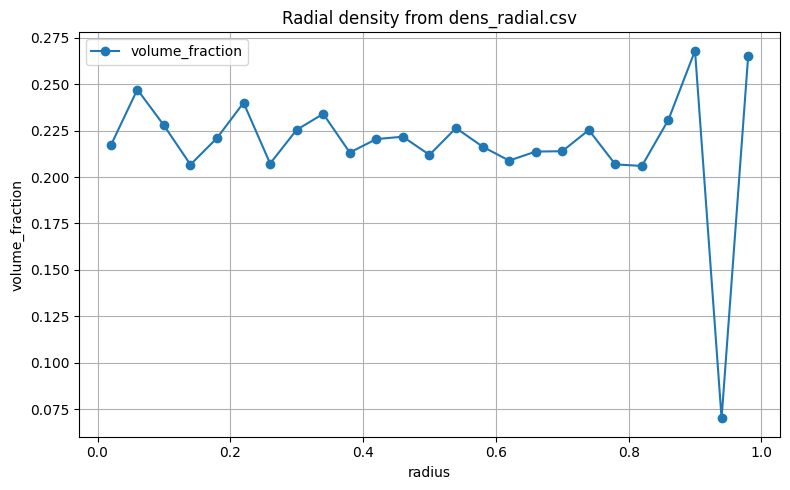

In [51]:
# Load and plot radial density
df_radial = pd.read_csv('data/dens_radial.csv')
df_radial.head()

num_radial = df_radial.select_dtypes(include=[np.number])
if num_radial.shape[1] == 0:
    raise RuntimeError("No numeric columns found in dens_radial.csv to plot.")

plt.figure(figsize=(8,5))

if num_radial.shape[1] == 1:
    # Single numeric column: plot vs index
    plt.plot(df_radial.index, num_radial.iloc[:, 0], '-o')
    plt.xlabel('index')
    plt.ylabel(num_radial.columns[0])
    plt.title(f"{num_radial.columns[0]} vs index (dens_radial.csv)")
else:
    # Use the first numeric column as x and plot remaining numeric columns vs it
    x_radial = num_radial.iloc[:, 0]
    for col_name in num_radial.columns[1:]:
        plt.plot(x_radial, num_radial[col_name], marker='o', label=col_name)
    plt.xlabel(num_radial.columns[0])
    plt.ylabel(' / '.join(num_radial.columns[1:]))
    plt.title("Radial density from dens_radial.csv")
    plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

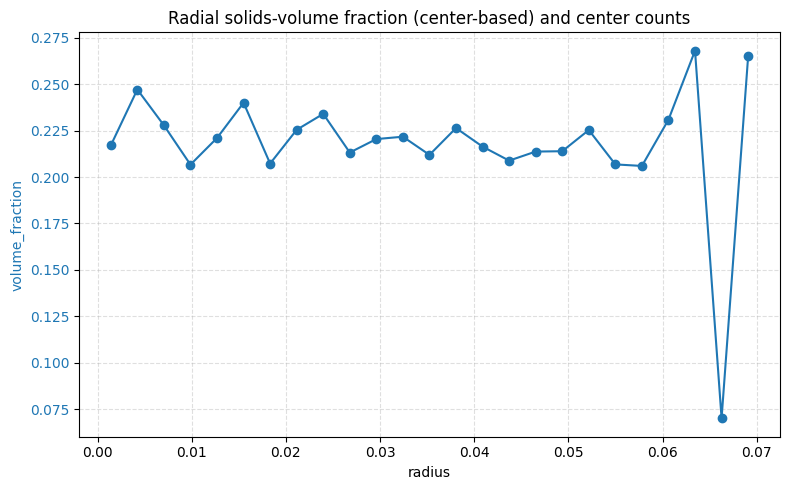

In [52]:
df = pd.read_csv("data/dens_radial_center.csv")

# expected columns: radius,count,volume_fraction_center
for col in ("radius","count","volume_fraction_center"):
    if col not in df.columns:
        raise RuntimeError(f"Missing column '{col}' in file")

r = df["radius"].to_numpy()
counts = df["count"].to_numpy()
phi = df["volume_fraction_center"].to_numpy()

# simple plot: phi (left y) and counts (right y)
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(r, phi, marker='o', linestyle='-', color='tab:blue', label='volume_fraction')
ax1.set_xlabel('radius')
ax1.set_ylabel('volume_fraction', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.4)

# ax2 = ax1.twinx()
# ax2.plot(r, counts, marker='s', linestyle='--', color='tab:orange', label='count')
# ax2.set_ylabel('count', color='tab:orange')
# ax2.tick_params(axis='y', labelcolor='tab:orange')

# # add combined legend
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Radial solids-volume fraction (center-based) and center counts')
plt.tight_layout()
plt.savefig("dens_radial_center_plot.png", dpi=200)
plt.show()